In [6]:
import pandas as pd
import os
import ast
import matplotlib.pyplot as plt

In [7]:
file_path = './CSV/dependentsOnArtifact'

list_high = []
list_mid = []
list_low = []

for file in os.listdir(file_path):
    if file.endswith(".csv"):
        prefix = int(file[:4])

        #for artifacts having more than 25000 dependents
        if 2 <= prefix <= 11:
            list_high.append(file)

        #for artifacts having dependents between 1000 to 5000
        elif 89 <= prefix <= 458:
            list_mid.append(file)

        #for artifacts having dependents between 100 to 500
        elif prefix >= 957:
            list_low.append(file)

In [8]:
def dependents(df):
    df['releaseDate'] = df['releaseDate'].str.strip('"')
    df['releaseDate'] = pd.to_datetime(df['releaseDate'], format='%Y-%m-%dT%H:%M:%SZ')
    df['year'] = df['releaseDate'].dt.year
    data = df[['year','dependentCount']]
    return data

In [9]:
df1 = pd.DataFrame()
df2 = pd.DataFrame()
df3 = pd.DataFrame()

In [10]:
for file in list_high:
    temp_df = pd.read_csv(os.path.join(file_path,file))
    df = dependents(temp_df)
    df1 = pd.concat([df1,df], ignore_index = True)

for file in list_mid:
    temp_df = pd.read_csv(os.path.join(file_path,file))
    df = dependents(temp_df)
    df2 = pd.concat([df2,df], ignore_index = True)

for file in list_low:
    temp_df = pd.read_csv(os.path.join(file_path,file))
    df = dependents(temp_df)
    df3 = pd.concat([df3,df], ignore_index = True)

In [11]:
df1

year  dependentCount
0     2006               6
1     2006               1
2     2006              13
3     2006               7
4     2007              46
...    ...             ...
1458  2021          195987
1459  2023           36908
1460  2023           24450
1461  2024             776
1462  2024             782

[1463 rows x 2 columns]

In [12]:
yearly_data1 = df1.groupby('year')[['dependentCount']].sum().reset_index()
yearly_data1.rename(columns = {'dependentCount': 'dependentCount_high'}, inplace=True)

print(yearly_data1)

    year  dependentCount_high
0   2006                   32
1   2007                 2047
2   2008                15482
3   2009                11859
4   2010                67007
5   2011                83926
6   2012               157354
7   2013               157446
8   2014               673657
9   2015               333495
10  2016               425246
11  2017              1033249
12  2018               536534
13  2019               977120
14  2020               874855
15  2021              1561432
16  2022              1610059
17  2023              1239120
18  2024               447261


In [13]:
yearly_data2 = df2.groupby('year')[['dependentCount']].sum().reset_index()
yearly_data2.rename(columns = {'dependentCount': 'dependentCount_mid'}, inplace=True)

print(yearly_data2)

    year  dependentCount_mid
0   2006                 863
1   2007                2119
2   2008                4803
3   2009                1768
4   2010                5297
5   2011               11653
6   2012                4533
7   2013                3796
8   2014               14355
9   2015               10759
10  2016               15406
11  2017              101880
12  2018               26298
13  2019               23205
14  2020               56532
15  2021               53615
16  2022               71948
17  2023               21540
18  2024               13813


In [14]:
yearly_data3 = df3.groupby('year')[['dependentCount']].sum().reset_index()
yearly_data3.rename(columns = {'dependentCount': 'dependentCount_low'}, inplace=True)

print(yearly_data3)

    year  dependentCount_low
0   2013                  26
1   2014                 475
2   2015                 983
3   2016                1122
4   2017                1126
5   2018                6947
6   2019                6427
7   2020               15208
8   2021               20455
9   2022                1961
10  2023                1713
11  2024                 365


In [15]:
merged_df = pd.merge(yearly_data1, yearly_data2, on='year', how='outer')
merged_df = pd.merge(merged_df, yearly_data3, on='year', how='outer')

merged_df.fillna(0, inplace=True)
merged_df['dependentCount_mid'] = merged_df['dependentCount_mid'].astype(int)
merged_df['dependentCount_low'] = merged_df['dependentCount_low'].astype(int)

In [16]:
merged_df

year  dependentCount_high  dependentCount_mid  dependentCount_low
0   2006                   32                 863                   0
1   2007                 2047                2119                   0
2   2008                15482                4803                   0
3   2009                11859                1768                   0
4   2010                67007                5297                   0
5   2011                83926               11653                   0
6   2012               157354                4533                   0
7   2013               157446                3796                  26
8   2014               673657               14355                 475
9   2015               333495               10759                 983
10  2016               425246               15406                1122
11  2017              1033249              101880                1126
12  2018               536534               26298                6947
13  2019               977120               23205                6427
14  2020               874855               56532               15208
15  2021              1561432               53615               20455
16  2022              1610059               71948                1961
17  2023              1239120               21540                1713
18  2024               447261               13813                 365

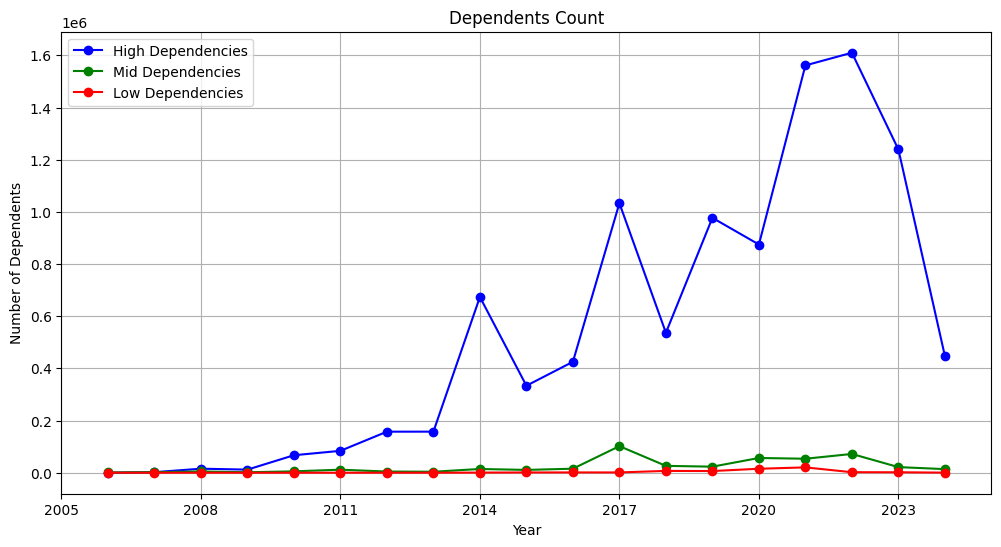

In [17]:
import matplotlib.pyplot as plt

unique_years = sorted(merged_df['year'].unique())

start_year = unique_years[0]-1  
end_year = unique_years[-1]+1  
year_intervals = list(range(start_year, end_year + 1, 3))  

plt.figure(figsize=(12, 6))

plt.plot(merged_df['year'], merged_df['dependentCount_high'], marker='o', label='High Dependencies', color='blue')
plt.plot(merged_df['year'], merged_df['dependentCount_mid'], marker='o', label='Mid Dependencies', color='green')
plt.plot(merged_df['year'], merged_df['dependentCount_low'], marker='o', label='Low Dependencies', color='red')

plt.xlim([start_year, end_year])
plt.xticks(year_intervals)

plt.title('Dependents Count')
plt.xlabel('Year')
plt.ylabel('Number of Dependents')
plt.legend()
plt.grid(True)
plt.show()

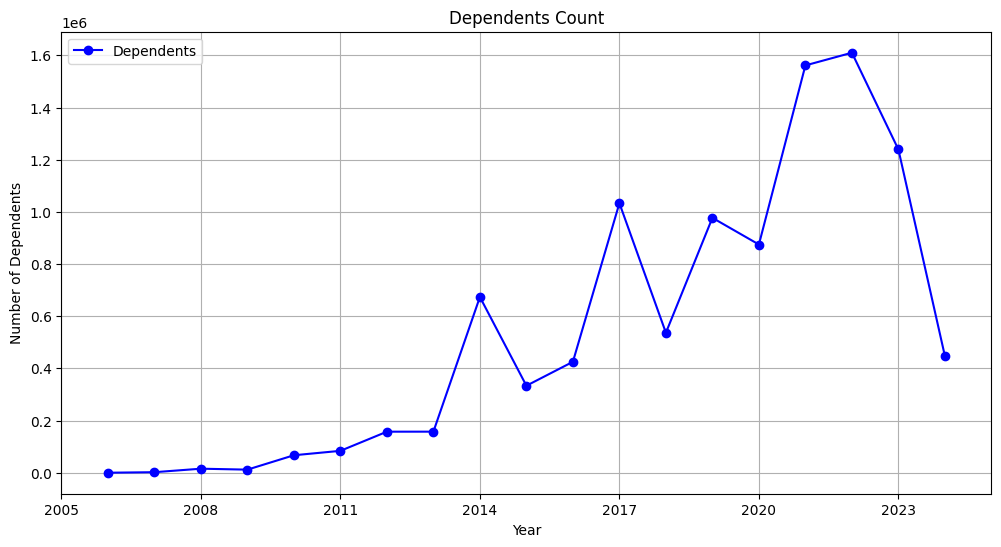

In [18]:
start_year = unique_years[0]-1  
end_year = unique_years[-1]+1  
year_intervals = list(range(start_year, end_year + 1, 3)) 

plt.figure(figsize = (12,6))
plt.plot(yearly_data1['year'],yearly_data1['dependentCount_high'], marker='o', label='Dependents', color='blue')

plt.xlim([start_year, end_year])
plt.xticks(year_intervals)

plt.title('Dependents Count')
plt.xlabel('Year')
plt.ylabel('Number of Dependents')
plt.legend()
plt.grid(True)
plt.show()

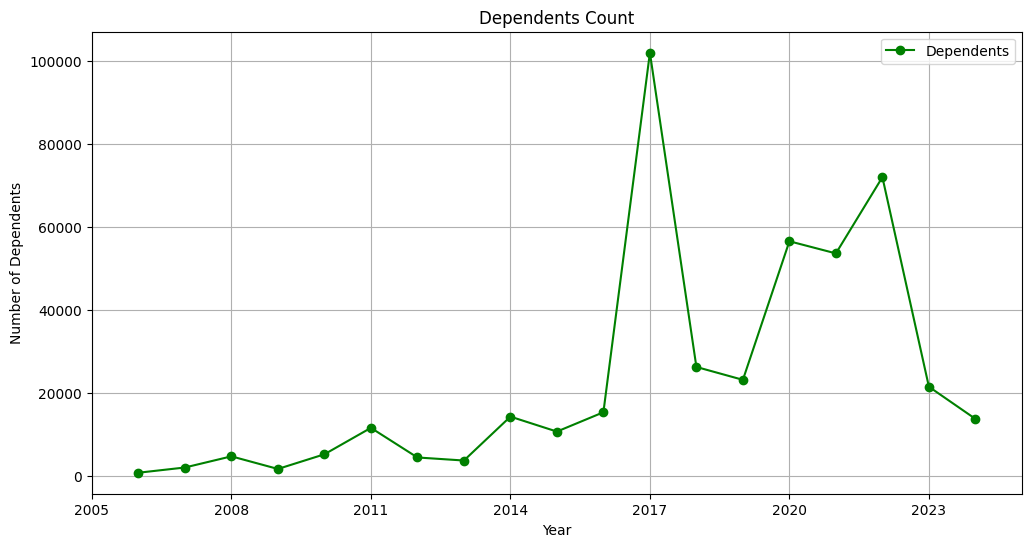

In [19]:
start_year = unique_years[0]-1  
end_year = unique_years[-1]+1  
year_intervals = list(range(start_year, end_year + 1, 3)) 

plt.figure(figsize = (12,6))
plt.plot(yearly_data2['year'],yearly_data2['dependentCount_mid'], marker='o', label='Dependents', color='green')

plt.xlim([start_year, end_year])
plt.xticks(year_intervals)

plt.title('Dependents Count')
plt.xlabel('Year')
plt.ylabel('Number of Dependents')
plt.legend()
plt.grid(True)
plt.show()

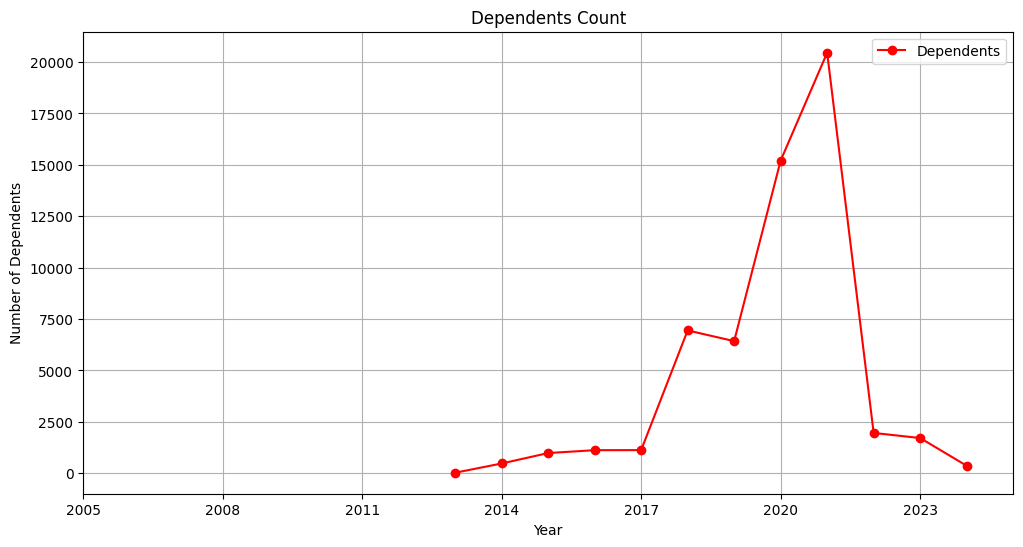

In [20]:
start_year = unique_years[0]-1  
end_year = unique_years[-1]+1  
year_intervals = list(range(start_year, end_year + 1, 3)) 

plt.figure(figsize = (12,6))
plt.plot(yearly_data3['year'],yearly_data3['dependentCount_low'], marker='o', label='Dependents', color='red')

plt.xlim([start_year, end_year])
plt.xticks(year_intervals)

plt.title('Dependents Count')
plt.xlabel('Year')
plt.ylabel('Number of Dependents')
plt.legend()
plt.grid(True)
plt.show()